#  **Proyecto final Introducción a los Sistemas Inteligentes**

## **Presentado por:**

## - **Angel David Piñeros Sierra**  
###  apineross@unal.edu.co  

## - **Kelly Johana Solano Calderon**  
### ksolanoc@unal.edu.co  

## - **Catalina Gomez Moreno**  
### catgomez@unal.edu.co  

---

## **Presentado a:**

## - **Fabio Augusto Gonzalez Osorio**  
### fagonzalezo@unal.edu.co  

---

## **Información del Curso:**

### - **Universidad:** Universidad Nacional de Colombia  
### - **Asignatura:** Introducción a los Sistemas Inteligentes  
### - **Semestre:** 2024-2  
### - **Fecha:** 7 de marzo de 2025

---

## **Definición de Términos Técnicos**

A continuación, se presentan las definiciones de los términos técnicos clave utilizados en el contexto de la cuantificación de la celularidad tumoral y el uso de aprendizaje automático en histopatología:


### **1. Celularidad Tumoral**
- **Definición**: Proporción de células cancerosas presentes en un tejido tumoral en relación con otros componentes, como el estroma o el tejido necrótico. Es una medida clave para evaluar la agresividad del tumor y la respuesta a tratamientos como la quimioterapia neoadyuvante.


### **2. Hematoxilina-Eosina (H&E)**
- **Definición**: Tinción histológica comúnmente utilizada en patología para visualizar tejidos bajo el microscopio. La hematoxilina tiñe los núcleos celulares de color azul/púrpura, mientras que la eosina tiñe el citoplasma y otras estructuras extracelulares de color rosa.


### **3. Segmentación**
- **Definición**: Proceso computacional que divide una imagen en regiones o objetos de interés, como núcleos celulares o áreas tumorales.


### **4. Aprendizaje Automático (Machine Learning)**
- **Definición**: Campo de la inteligencia artificial que utiliza algoritmos para aprender patrones a partir de datos y hacer predicciones o decisiones sin ser programado explícitamente.


### **5. Redes Neuronales Convolucionales (CNN)**
- **Definición**: Tipo de red neuronal profunda diseñada para procesar datos estructurados en forma de cuadrícula, como imágenes. Utiliza capas convolucionales para extraer características automáticamente.


### **6. Pre-entrenamiento (Transfer Learning)**
- **Definición**: Técnica en la que un modelo previamente entrenado en un conjunto de datos grande (por ejemplo, ImageNet) se ajusta para una tarea específica (por ejemplo, cuantificación de celularidad).


### **7. Error Cuadrático Medio (MSE)**
- **Definición**: Métrica que mide el promedio de los errores al cuadrado entre las predicciones de un modelo y los valores reales.


### **8. Error Absoluto Medio (MAE)**
- **Definición**: Métrica que mide el promedio de las diferencias absolutas entre las predicciones y los valores reales.


### **9. Error Relativo Medio (MAPE)**
- **Definición**: Métrica que calcula el error porcentual promedio entre las predicciones y los valores reales.


### **10. PK Score (prediction probability concordance)**
- **Definición**: Métrica que evalúa la concordancia entre el orden de las predicciones y el orden de los valores reales. Se basa en la comparación de pares de predicciones y valores reales.


### **11. Whole Slide Imaging (WSI)**
- **Definición**: Técnica de digitalización de muestras histológicas completas para su visualización y análisis en formato digital.


### **12. Biomarcador**
- **Definición**: Indicador biológico medible que puede usarse para evaluar procesos fisiológicos o patológicos, como la presencia o progresión de una enfermedad.


### **13. Terapia Neoadyuvante**
- **Definición**: Tratamiento administrado antes de la cirugía para reducir el tamaño del tumor y mejorar los resultados quirúrgicos.


### **14. Variabilidad Interobservador**
- **Definición**: Diferencia en las evaluaciones realizadas por distintos observadores (por ejemplo, patólogos) al analizar la misma muestra.


#### **15. Conjunto de Datos (Dataset)**
- **Definición**: Colección de datos organizados y etiquetados utilizados para entrenar y evaluar modelos de aprendizaje automático.

---

# **(A) Descripción del problema: Cuantificación de la Celularidad Tumoral en Histopatología**

La celularidad tumoral se refiere a la proporción de células cancerosas presentes en un tejido tumoral en relación con otros componentes, como el estroma o el tejido muerto. Es una medida clave para evaluar la agresividad del tumor y, especialmente, la respuesta a tratamientos como la terapia neoadyuvante en cáncer de mama [1]. Por ejemplo, después de la quimioterapia preoperatoria, el tamaño del tumor podría no cambiar significativamente, pero la celularidad tumoral puede disminuir drásticamente (menos células malignas vivas) [2]. Por ello, cuantificar la celularidad tumoral en las muestras quirúrgicas es crucial para determinar la efectividad del tratamiento y guiar el manejo clínico. Tradicionalmente, esta estimación la realizan los patólogos examinando cortes histológicos teñidos con hematoxilina-eosina (H&E) bajo el microscopio [2]. Sin embargo, este proceso manual es lento, tedioso y subjetivo, con variaciones significativas entre observadores, incluso entre expertos [2], [3]. Dada la importancia de la celularidad tumoral como biomarcador, estas limitaciones han motivado la búsqueda de métodos automatizados más objetivos y reproducibles [2]. 

Antes del auge del machine learning, se exploraron enfoques computacionales clásicos para cuantificar la celularidad tumoral. Un método convencional es segmentar primero las células tumorales en la imagen y luego calcular la fracción de área tumoral a partir de esa segmentación [2], [4]. Por ejemplo, Peikari et al. desarrollaron un protocolo donde se extraían regiones de interés de la lámina digital, segmentaban todos los núcleos celulares y luego calculaban características morfológicas de esos núcleos (tamaño, forma, densidad) para entrenar un clasificador (por ejemplo, SVM) que distinguía núcleos malignos de benignos; con ello estimaban la celularidad contando solo los núcleos malignos segmentados [2], [4]. Este enfoque requiere anotaciones manuales extensas (para entrenar el segmentador) y depende de características hechas a mano basadas en conocimientos biomédicos. Otra alternativa tradicional evitaba la segmentación explícita: por ejemplo, Veta et al. usaron las coordenadas de núcleos anotados por expertos para que una red neuronal de ~10 capas predijera directamente áreas nucleares y derivara la celularidad, sin segmentar cada núcleo por separado [2], [4]. Si bien estos métodos mostraron que era posible automatizar parcialmente la cuantificación, tenían limitaciones en exactitud y generalización debido a la complejidad de las imágenes y la diversidad de patrones.

El aprendizaje automático, y en particular el deep learning, ha demostrado ventajas claras para afrontar este problema. Las redes neuronales convolucionales (CNN) modernas aprenden automáticamente características relevantes de las imágenes sin necesidad de definir manualmente cada patrón [1]. En lugar de depender de segmentaciones intermedias o medidas definidas por humanos, un modelo de deep learning puede ingerir directamente el parche de imagen crudo y aprender filtros convolucionales óptimos que destaquen las estructuras que correlacionan con la celularidad tumoral [1]. Esto significa que el algoritmo analiza la imagen completa del tejido y descubre por sí mismo qué texturas, colores o formas indican más o menos células tumorales, optimizando sus pesos para predecir correctamente el porcentaje de celularidad. Esta capacidad de análisis de bajo nivel a alto nivel permite capturar la compleja morfología tumoral mejor que los descriptores manuales tradicionales. De hecho, numerosas aplicaciones biomédicas recientes han mostrado que las CNN superan a los métodos de machine learning convencional en precisión y robustez [2]. En el caso de cuantificar celularidad, trabajos previos encontraron que los enfoques basados en CNN end-to-end (de imagen a porcentaje) superan en exactitud a los métodos basados en segmentación + características, además de mejorar la consistencia de las mediciones entre evaluadores [2]. En resumen, el deep learning ofrece una solución más automática, objetiva y reproducible: minimiza el sesgo del observador humano, reduce la variabilidad interobservador y acelera el análisis (un algoritmo puede procesar múltiples campos de visión en segundos, algo impráctico manualmente) [3].


En concreto, el coeficiente de concordancia promedio (*prediction probability concordance*, PK) de los algoritmos top (0.93) fue comparable al PK 0.927 de los propios patólogos entre sí [5]. Dicho de otro modo, de los mejores modelos lograba ordenar las imágenes por celularidad tan bien como un experto humano, situándose a la par del desempeño humano. Incluso se reportó que el algoritmo mejor clasificado logró superar ligeramente la precisión promedio de los patólogos en el conjunto de prueba [1]. Importante también es que estos modlos no mostraron errores graves ni estimaciones fuera de rango, y ofrecieron evaluaciones consistentes y repetibles para los mismos datos [1].

Las ventajas de aplicar ML en este contexto se hicieron patentes en el desafío. Primero, la eficiencia: un modelo automatizado puede procesar en pocos minutos miles de parches, acelerando lo que sería un análisis manual muy laborioso. Segundo, la objetividad y reproducibilidad: a diferencia del ojo humano, que puede fatigar o variar criterio, el algoritmo aplica la misma lógica a cada imagen, reduciendo la variabilidad [2], [1]. Tercero, la posibilidad de estandarizar la medición de celularidad para usarla como biomarcador cuantitativo robusto en ensayos clínicos, algo difícil de lograr solo con evaluaciones visuales tradicionales dada la subjetividad involucrada [2]. La relevancia del desafio demostró que los modelos de aprendizaje profundo pueden resolver el problema de cuantificación de celularidad tumoral satisfactoriamente, alcanzando desempeño de nivel experto [1]. Esto sienta las bases para integrar tales algoritmos como asistentes en la práctica patológica, ofreciendo una segunda lectura o pre-cálculo de celularidad que el patólogo puede usar para confirmar y agilizar su diagnóstico.

---

## **Importación de Bibliotecas**

A continuación, se describen las bibliotecas utilizadas en el desarrollo del modelo, actualizadas con las nuevas importaciones:

---

### **Bibliotecas Principales**

1. **os**:  
   - Permite interactuar con el sistema operativo, útil para manejar archivos y directorios en la carga de datos.

2. **random**:  
   - Proporciona funciones para generar números aleatorios, utilizada para seleccionar muestras aleatorias del conjunto de datos.

3. **matplotlib.pyplot (plt)**:  
   - Librería para visualización de datos y gráficos, utilizada para mostrar imágenes y resultados.

4. **PIL (Python Imaging Library)**:  
   - Se usa para cargar y manipular imágenes en diferentes formatos.

5. **pandas (pd)**:  
   - Utilizada para manipulación y análisis de datos tabulares, como la carga de etiquetas desde archivos CSV.

6. **numpy (np)**:  
   - Proporciona soporte para operaciones matemáticas y manejo de arrays, útil para cálculos numéricos.

7. **seaborn (sns)**:  
   - Librería de visualización basada en matplotlib, utilizada para crear gráficos estadísticos atractivos.

---

### **Bibliotecas de PyTorch**

1. **torch**:  
   - Librería principal de PyTorch para el desarrollo y entrenamiento de modelos de aprendizaje profundo.

2. **torch.nn**:  
   - Proporciona módulos y funciones para construir redes neuronales en PyTorch.

3. **torch.optim**:  
   - Contiene optimizadores utilizados para entrenar modelos mediante descenso de gradiente.

4. **torchvision.transforms**:  
   - Ofrece transformaciones para preprocesar imágenes antes de ingresarlas al modelo.

5. **torch.utils.data (Dataset y DataLoader)**:  
   - Facilita la gestión de los conjuntos de datos y su alimentación al modelo en lotes.

6. **torchvision.models (efficientnet_v2_s)**:  
   - Se importa el modelo preentrenado EfficientNetV2-S, que se usará como base para la clasificación.

7. **torch.nn.functional (F)**:  
   - Contiene funciones útiles como activaciones, pérdidas y operaciones sobre tensores.

---

### **Bibliotecas de Scikit-learn**

1. **sklearn.metrics**:  
   - Proporciona métricas de evaluación como el Error Cuadrático Medio (MSE) y el Error Absoluto Medio (MAE).

---

### **Uso en el Notebook**

Estas bibliotecas permiten construir un pipeline de aprendizaje profundo que incluye:

1. **Carga y preprocesamiento de datos**:  
   - Se usa `os`, `pandas`, `PIL`, y `torchvision.transforms` para leer imágenes y etiquetas.

2. **Definición del modelo**:  
   - Se emplea `torch.nn` y `efficientnet_v2_s` para crear la red neuronal.

3. **Entrenamiento**:  
   - `torch.optim` y `torch.nn.functional` ayudan a definir el proceso de optimización y la función de pérdida.

4. **Evaluación y predicción**:  
   - Se aplican las herramientas de PyTorch y Scikit-learn para evaluar el modelo y generar predicciones sobre datos de prueba.

5. **Visualización**:  
   - `matplotlib.pyplot` y `seaborn` se utilizan para visualizar imágenes, gráficos de pérdida y resultados.

---

In [1]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import os
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import torchvision.transforms as transforms
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import itertools
from torchvision.models import efficientnet_v2_s
import torch.nn.functional as F
import seaborn as sns
import torch
import itertools
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

## **(B) Importación y organización de datos**

En esta sección, organizamos los conjuntos de datos para entrenamiento, validación y prueba.  
Los datos provienen del desafío **BreastPathQ 2019** y están estructurados en imágenes de parches histológicos junto con sus etiquetas.

### **1️ Directorios de imágenes**
- **`train_image_dir`**: Contiene las imágenes de entrenamiento con sus etiquetas.
- **`val_image_dir`**: Contiene las imágenes de validación con sus etiquetas.
- **`test_image_dir`**: Contiene las imágenes de prueba (sin etiquetas).

### **2️ Rutas de etiquetas**
- **`train_label_path`**: Archivo CSV con etiquetas de entrenamiento.
- **`val_label_path`**: Archivo CSV con etiquetas de validación.

---

## **Procesamiento de los conjuntos de datos**

1. **Entrenamiento (`df_train`)**
   - Se carga el CSV de entrenamiento.
   - Se genera el nombre de cada imagen combinando `slide` y `rid`.
  
2. **Validación (`df_val`)**
   - Se listan todas las imágenes del directorio de validación.
   - Se extrae el `slide` y `rid` del nombre del archivo.
   - Se unen estos datos con el CSV de etiquetas.

3. **Prueba (`df_test`)**
   - Se listan todas las imágenes del directorio de prueba.
   - Se extrae el `slide` y `rid` del nombre del archivo.
   - **(Importante)** No hay etiquetas en este conjunto.

---

## **Diagrama de distribución de imagenes en los conjuntos de datos**
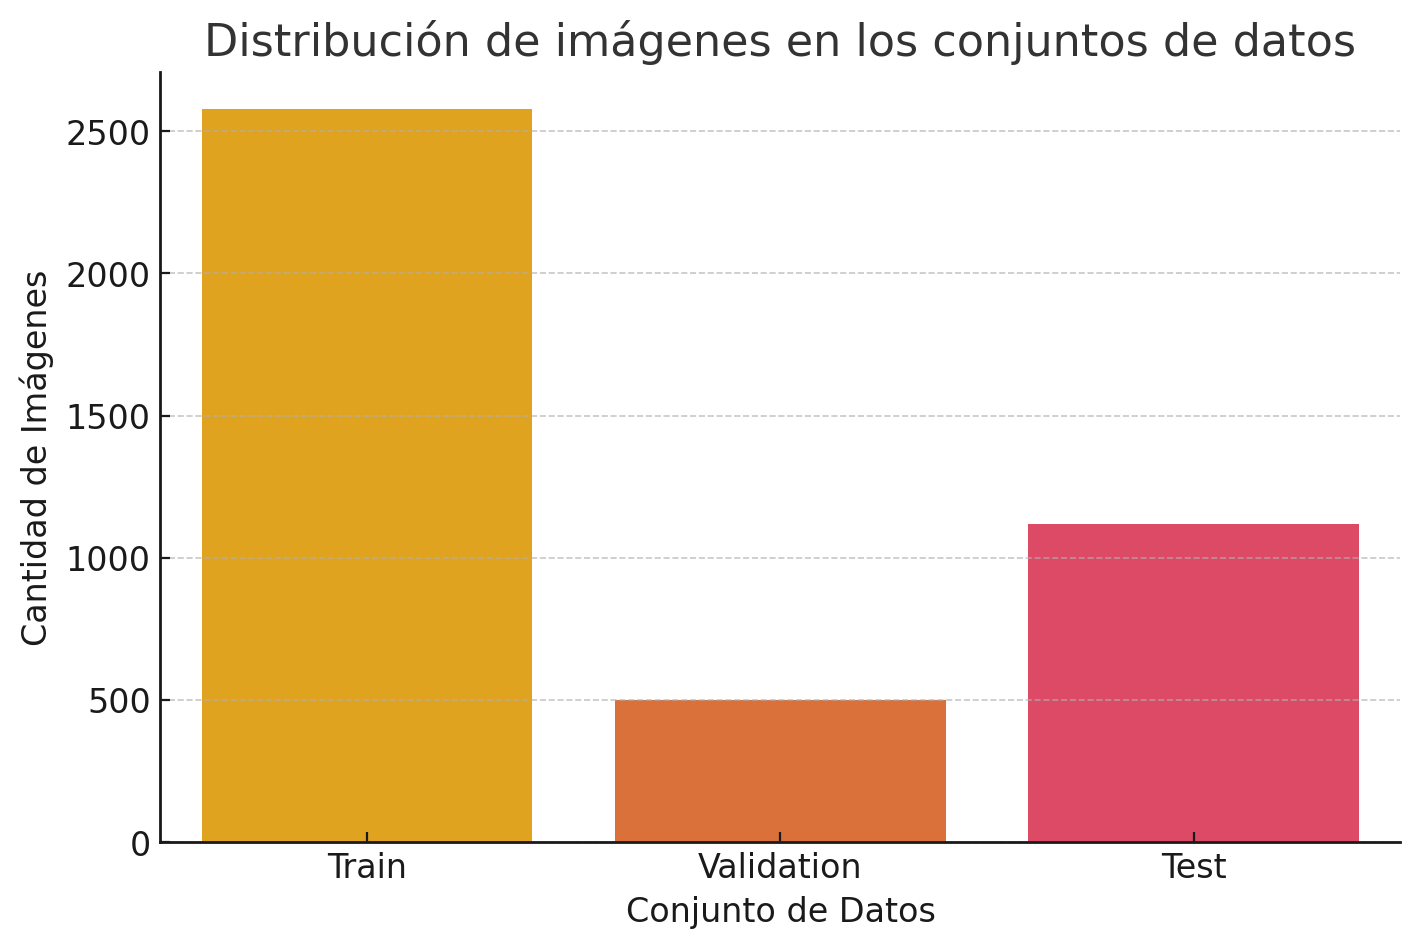


---


In [2]:
# Directorios de imágenes
train_image_dir = "datasets/SPIE_BreastPathQ2019_Training_Validation/breastpathq/datasets/train"
val_image_dir = "datasets/SPIE_BreastPathQ2019_Training_Validation/breastpathq/datasets/validation"
test_image_dir = "datasets/SPIE_BreastPathQ2019_Testing/breastpathq-test/test_patches"

# Rutas de etiquetas
train_label_path = "datasets/SPIE_BreastPathQ2019_Training_Validation/breastpathq/datasets/train_labels.csv"
val_label_path = "datasets/SPIE_BreastPathQ2019_Testing/breastpathq-test/val_labels.csv"

# Cargar datos
df_train = pd.read_csv(train_label_path)
df_train["image_name"] = df_train["slide"].astype(str) + "_" + df_train["rid"].astype(str) + ".tif"

val_images = [f for f in os.listdir(val_image_dir) if f.endswith(".tif")]
df_val = pd.DataFrame({"image_name": val_images})
df_val[["slide", "rid"]] = df_val["image_name"].str.extract(r'(\d+)_(\d+).tif').astype(int)
df_val_labels = pd.read_csv(val_label_path)
df_val = df_val.merge(df_val_labels, on=["slide", "rid"], how="left")

test_images = [f for f in os.listdir(test_image_dir) if f.endswith(".tif")]
df_test = pd.DataFrame({"image_name": test_images})
df_test[["slide", "rid"]] = df_test["image_name"].str.extract(r'(\d+)_(\d+).tif').astype(int)

# Resumen de conjuntos de datos
print("Organización Final de Conjuntos:")
print(f"Train: {len(df_train)} imágenes")
print(f"Validation: {len(df_val)} imágenes")
print(f"Test_patches: {len(df_test)} imágenes (Debe ser 1119)")


Organización Final de Conjuntos:
Train: 2394 imágenes
Validation: 185 imágenes
Test_patches: 1119 imágenes (Debe ser 1119)


## **(C) Exploración de Datos y Transformación de Imágenes**

En esta sección, se define la clase `BreastDataset`, que nos permite organizar y acceder a las imágenes del dataset de cáncer de mama. Además, se aplican transformaciones a las imágenes para normalizarlas y adaptarlas al modelo de clasificación.

### **Definición de la Clase `BreastDataset`**

Esta clase hereda de `torch.utils.data.Dataset` y tiene los siguientes métodos:

- **`__init__(self, df, image_dir, transform=None, is_test=False)`**:  
  - Recibe un DataFrame con la información de las imágenes (`df`).
  - Recibe la ruta donde están almacenadas las imágenes (`image_dir`).
  - Opcionalmente, recibe una transformación (`transform`) que se aplicará a las imágenes antes de ingresarlas al modelo.
  - El parámetro `is_test` indica si el dataset pertenece al conjunto de prueba (sin etiquetas).

- **`__len__(self)`**:  
  - Devuelve la cantidad de imágenes en el dataset.

- **`__getitem__(self, idx)`**:  
  - Carga una imagen específica basada en su índice `idx`.
  - Aplica las transformaciones definidas si están presentes.
  - Si `is_test=True`, devuelve solo la imagen y su nombre (sin etiqueta).  
  - En caso contrario, devuelve la imagen junto con su etiqueta (`y`).

---

### **Transformaciones aplicadas a las imágenes**

Se define una serie de transformaciones en la variable `transform`, utilizando `torchvision.transforms`:

1. **Redimensionado**:  
   - `transforms.Resize((300, 300))`: Escala todas las imágenes a 300x300 píxeles para que el modelo las procese correctamente.
   
2. **Conversión a tensor**:  
   - `transforms.ToTensor()`: Convierte la imagen a un tensor, necesario para PyTorch.
   
3. **Normalización**:  
   - `transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])`: Ajusta los valores de los píxeles para que el modelo preentrenado (EfficientNetV2) los procese mejor.

---

### **Valores de normalización basados en ImageNet**

Estos valores no son elegidos al azar. Se basan en las estadísticas de las imágenes del conjunto de datos ImageNet, un dataset masivo utilizado para entrenar muchos modelos de visión artificial, incluyendo EfficientNetV2.

1. **¿Qué significan estos valores?**

   - **mean=[0.485, 0.456, 0.406]**: Son los valores promedio (media) de los canales Rojo (R), Verde (G) y Azul (B) en todas las imágenes de ImageNet.
   - **std=[0.229, 0.224, 0.225]**: Representan la desviación estándar de cada canal en el conjunto de ImageNet.

2. **¿Por qué se normalizan las imágenes con estos valores?**

   Los modelos preentrenados como EfficientNetV2 han sido entrenados con imágenes que ya estaban normalizadas con estos valores de ImageNet. Cuando usamos este modelo para nuestro problema, queremos que las imágenes de nuestro dataset tengan una distribución de píxeles similar a la de las imágenes con las que EfficientNetV2 fue entrenado. Esto tiene varios beneficios:

   - **Compatibilidad con el modelo**: EfficientNetV2 fue entrenado esperando imágenes con esta normalización, por lo que al usar los mismos valores, aseguramos que nuestro modelo procese los datos correctamente.
   - **Asegurar que las imágenes tengan una escala uniforme**: Sin normalización, los valores de los píxeles de las imágenes originales pueden estar entre 0 y 255 (escala RGB), lo que podría generar problemas numéricos al entrenar una red neuronal. Al normalizar, los valores se transforman a una distribución con media cercana a 0 y varianza cercana a 1, lo que ayuda a estabilizar el entrenamiento.
   - **Facilitar la convergencia del modelo**: Al normalizar, evitamos que algunos canales dominen sobre otros, reduciendo el riesgo de que el modelo aprenda patrones sesgados debido a diferencias en escala entre los valores de píxeles.

3. **¿Qué pasa si no normalizamos?**

   Si no aplicamos esta normalización:

   - Los valores de los píxeles seguirían en el rango [0, 255] o [0, 1] (si solo usamos `ToTensor()`), lo que haría que el modelo tenga dificultades para hacer predicciones precisas.
   - La red podría tardar más en aprender, porque tendría que ajustarse a datos con una escala diferente a la que usó en su entrenamiento inicial.
   - En algunos casos, el modelo podría dar resultados inconsistentes o con menor precisión.

4. **¿Cómo afecta visualmente la imagen transformada?**

   En la imagen transformada:

   - Vemos un aumento del contraste, lo que hace que las estructuras celulares sean más evidentes.
   - Los tonos pueden parecer más saturados o distintos, ya que la normalización ajusta los valores de los píxeles en función de la distribución esperada por el modelo.

---

In [3]:
class BreastDataset(Dataset):
    def __init__(self, df, image_dir, transform=None, is_test=False):
        self.df = df
        self.image_dir = image_dir
        self.transform = transform
        self.is_test = is_test

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_name = self.df.iloc[idx]["image_name"]
        img_path = os.path.join(self.image_dir, img_name)
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        if self.is_test:
            return image, img_name
        else:
            label = self.df.iloc[idx]["y"]
            return image, torch.tensor(label, dtype=torch.float32)


#### **Información General**

De acuerdo a cada DataFrame generado, se verifica qué tipo de información contienen, a partir de las funciones de `.info()` y `.describe()`.

*Para recordar:*


*   **`.info()`**: Esta función permite obtener información sobre los tipos de datos de los índices de las columnas y las filas, los valores no nulos y la memoria usada.
*   **`.describe()`**: Esta función ofrece estadísticas descriptivas, como medidas de tendencia central, dispersión y distribución del conjunto de datos. Como el el DataFrame del estudio cuenta con valores numéricos, el resultado incluye datos de conteo (count), promedio (mean), desviación estándar (std), valor mínimo (min), valor máximo (max) y percentiles.



In [4]:
"""
Obtención de información general por medio de las funciones de .info() y .describe()
"""

for name, df in zip(["Train", "Validation", "Test"], [df_train, df_val, df_test]):
    print(f"\n========== {name} Dataset ==========")
    print()
    print(df.info())  # Tipos de datos y valores nulos
    print("---------------------------------------")
    print(df.describe())  # Estadísticas descriptivas
    print("---------------------------------------")
    print(f"Valores nulos en {name}:\n", df.isnull().sum())  # Valores nulos


========== Train Dataset ==========

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2394 entries, 0 to 2393
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   slide       2394 non-null   int64  
 1   rid         2394 non-null   int64  
 2   y           2394 non-null   float64
 3   image_name  2394 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 74.9+ KB
None
---------------------------------------
              slide          rid            y
count   2394.000000  2394.000000  2394.000000
mean   99823.298246    22.799916     0.312018
std       21.307188    15.948218     0.320758
min    99788.000000     1.000000     0.000000
25%    99807.000000    10.000000     0.000000
50%    99822.000000    20.000000     0.200000
75%    99843.000000    32.000000     0.500000
max    99861.000000    77.000000     1.000000
---------------------------------------
Valores nulos en Train:
 slide         0
rid    

***¿Qué se obtuvo?***

*   *Train Dataset:* Después de usar el `.info()` se obtiene que el Dataframe contiene un total de 2394 registros, con índices entre 0 a 2393. Tiene un total de 5 columnas, que son:

    -   ***slide (Identificador de la imagen):*** Esta columna contiene valores `int64` no nulos. Representan los ID que referencian a la diapositiva de tejido que tiene la imagen.
    -  ***rid (Identificador de región de interés - ROI):*** Contiene valores `int64` no nulos. Representa los identificadores únicos dentro de las diapositivas de tejidos para lograr identificar la "región de interés (ROI)."
    -   ***y (Celularidad):*** Esta columna contiene valores `float64`, que representan la densidad tumoral encontrada en la imagen.
    -   ***image_name ():***  Valores de tipo `object` no nulos. Refiere al nombre del archivo de la imagen.
    -   ***slide_group ():*** Esta columna contiene valores `int64` no nulos. Número del grupo de clasificación de la diapositiva.
    -   La media de los datos de celularidad es igual a 0.3121, lo que representa una celularidad tumoral media-baja. En el caso de los percentiles 25% y 75%, la celularidad se encuentra entre 0.0700 y 0.5000, lo que indica que la mayoría de las muestras cuentan con un nivel de celularidad bajo.
    -   La media de la columna `rid` es iugal a 22.79, es decir, en promedio cada diapositiva tiene 23 regiones de interés.
    -   Los diferentes resultados de desviación estándar, indican que, en el caso de `rid` el valor es 22.79, es decir, la cantidad de regiones de interés varían bastante, porque hay valores muy bajos (aprox. 1) y muy altos (aprox. 77).  Este tipo de comportamiento permite que el modelo pueda generalizar mejor.

*   *Validation Dataset:* Se obtiene que el DataFrame contiene un total de 185 registros, con índices entre 0 y 184.
Tiene un total de 4 columnas, que son:

    *    ***image_name (Nombre del archivo de imagen)***: Esta columna contiene valores object no nulos. Representa el nombre del archivo de la imagen (slide_rid.tif).
    *    ***slide (Identificador de la diapositiva)***: Esta columna contiene valores int64 no nulos. Representa el ID que referencia la diapositiva de tejido que tiene la imagen.
    *   ***rid (Identificador de región de interés - ROI)***: Contiene valores int64 no nulos. Representa los identificadores únicos dentro de las diapositivas de tejido para identificar la "región de interés (ROI)."
    *    ***y (Celularidad)***: Esta columna contiene valores float64, que representan la densidad tumoral encontrada en la imagen.
    *   La media de los datos de celularidad, muestran en este caso un valor de 0.34, que es mayor al mostrado en los datos de entrenamiento, manteniendose en un nivel moderado-bajo.
    *   En el caso de `rid`, la media está en 17.15, lo que indica una disminución en la cantidad de regiones de interés, comparado con los datos de train.
    *   La celularidad muestra una desviación estándar de 0.29, que es cercana a la media de 0.34, mostrando variabilidad moderada.
    *   Existe una alta dispersión para la columna de `rid`, porque el valor de 10.69, comparado con la media de 17.15, evidencia una variación en los datos alta, donde pueden estar o muy por encima o muy por debajo de la media.


*   *Test Dataset:* Se obtiene que el DataFrame contiene un total de 1,119 registros, con índices entre 0 y 1,118.
Tiene un total de 3 columnas, que son:
    *   ***image_name (Nombre del archivo de imagen):*** Esta columna contiene valores object no nulos. Representa el nombre del archivo de la imagen (slide_rid.tif).
    *   ***slide (Identificador de la diapositiva)***: Esta columna contiene valores int64 no nulos. Representa el ID que referencia la diapositiva de tejido que tiene la imagen.
    *    ***rid (Identificador de región de interés - ROI)***: Contiene valores int64 no nulos. Representa los identificadores únicos dentro de las diapositivas de tejido para identificar la "región de interés (ROI)."
    *    El resultado en la dispersión de las regiones de interés muestra un valor alto de 17.55, en comparación con su media de 24.63. Se interpreta que Este dataset tiene imágenes de regiones de interés con características muy distintas. Este comportamiento requiere que se entrene teniendo en cuenta la alta variedad para obtener un buen desempeño.

#### ***Histogramas por dataset***

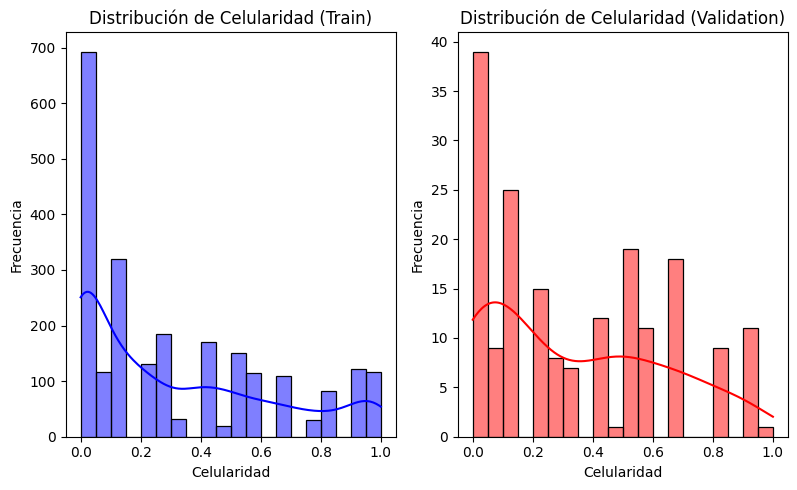

In [5]:
# Histograma de cada dataset
plt.figure(figsize=(12, 5))

for i, (name, df, color) in enumerate(zip(["Train", "Validation"], [df_train, df_val], ["blue", "red"])):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df['y'], bins=20, kde=True, color=color)
    plt.title(f"Distribución de Celularidad ({name})")
    plt.xlabel("Celularidad")
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

**¿Qué se obtiene?**

---
*Distribución de celularidad en datos de entrenamiento*

*   La gráfica muestra una distribución sesgada a la izquierda, donde se presenta una mayor frecuencia de datos que indican que aproximadamente 700 muestras presentan un 0.0 porciento de celularidad.
*   Hay un segundo pico de celularidad (entre los rangos de 0.1 a 0.2, donde el nivel de muestras baja a 300.
*   El comportamiento muestra que disminuye significamente la cantidad de muestras con celulalidad alta.
*   La curva KDE (línea suavizada) confirma la existencia de una distribución no uniforme con tendencia descendente.

---
*Distribución de celularidad en datos de prueba*

*   Esta gráfica también presenta un sesgo a la izquierda, que en comparación con los datos de entrenamiento, tiene una distribución más equilibrada, conforme aumenta la celularidad.
*   El pico con mayor frecuencia se encuentra en 0.0 de celularidad, con una frecuencia de 40 muestras.
*   A lo largo de los niveles de celularidad se presentan más picos entre los rangos de 0.6 y 0.8.
*   Se percibe que la distribución puede ser bimodal o multimodal al presentar varias regiones con concentraciones altas (por ejemplo, en la zona central de la gráfica).

---





#### ***Análisis de la distribución de los datos***

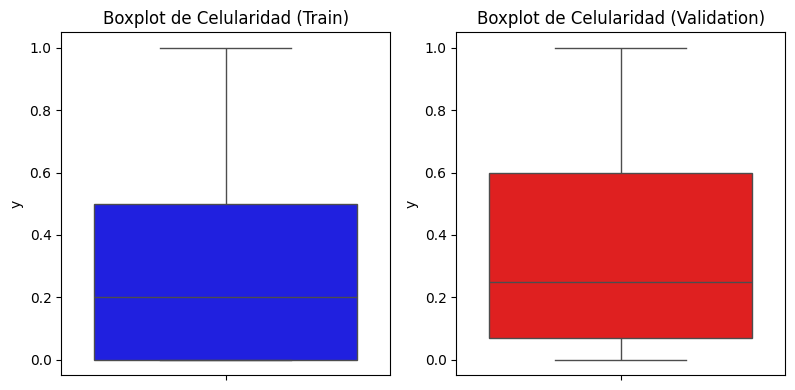

In [6]:
plt.figure(figsize=(12, 4))

for i, (name, df, color) in enumerate(zip(["Train", "Validation"], [df_train, df_val], ["blue", "red"])):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df['y'], color=color)
    plt.title(f"Boxplot de Celularidad ({name})")

plt.tight_layout()
plt.show()

***¿Qué se obtiene?***

---
*Boxplot de la celularidad en los datos de entrenamiento*

*   Mediana: La mediana se encuentra en un valor de 0.2, lo que indica que el 50% de las muestras de entrenamiento tiene una celularidad menor a 0.2.
*   Rango intercuartílico (IQR): La caja se extiende desde 0.0 hasta 0.5, abarcando el valor central de los datos.
*   Valores extremos: Los valores máximos y mínimos (los bigotes de la caja), se extienden hasta el valor de 1.0, lo que indica que hay muestras con valores de celularidad bastante altos, aunque menos frecuentes.
---
*Boxplot de la celularidad en los datos de validación*

*   Mediana: La mediana se ubica en el valor de 0.25, que es más alto al valor presentado en los datos de entrenamiento.
*   Rango intercuartílico: La caja es más amplia que los datos de entrenamiento, ya que abarca desde 0.05 hasta 0.6. Es decir, hay una mayor variabilidad en el conjunto de datos de validación.
*   Valores extremos: Se presenta el mismo comportamiento de los datos de entrenamiento, donde se extiende desde 0.0 a 1.0.

#### ***Análisis de distribución de celularidad por grupos***

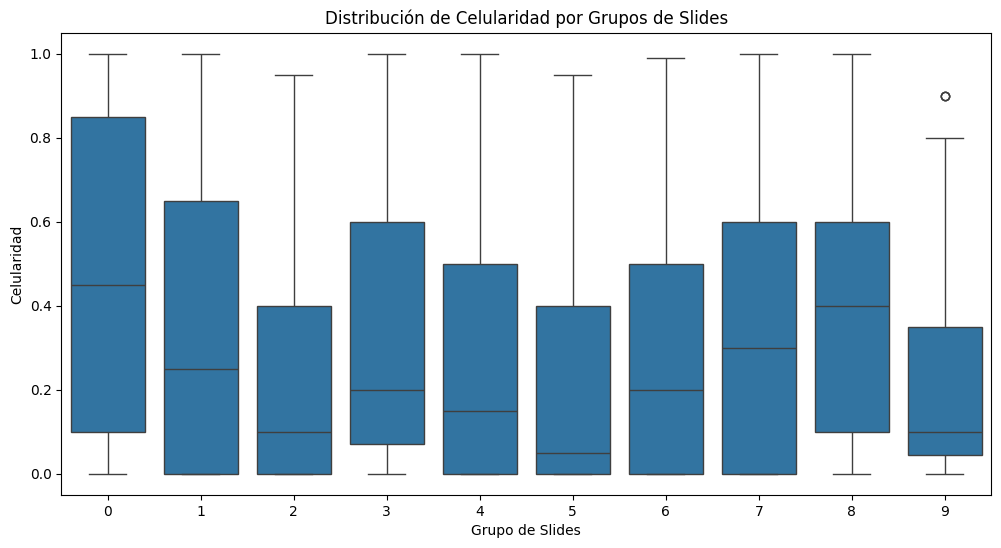

In [7]:
df_train["slide_group"] = pd.qcut(df_train["slide"], q=10, labels=False)  # Divide en 10 grupos
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_train["slide_group"], y=df_train["y"])
plt.title("Distribución de Celularidad por Grupos de Slides")
plt.xlabel("Grupo de Slides")
plt.ylabel("Celularidad")
plt.show()

***¿Qué se observa?***

A partir de un agrupamiento de los slices en 10 grupos, se tiene:
*   El grupo 0 presenta una mediana más alta (de aproximadamente 0.45), con una mayor concentración en los valores altos de celularidad.
*   En el caso de los grupo 2, 5 y 9, se presentan las medianas más bajas (de altedeodr de 0.1 a menos de 0.2.
*   La gran mayoría de los grupos muestran una amplia dispersión de los datos, por ejemplo, el grupo 0 tiene el tamaño de caja más amplio en la parte superior, lo que indica que la celularidad en este grupo es alta. En el caso del grupo 9, la distribución es más compacta, lo que indica un nivel de celularidad bajo.
*   Se evidencia un valor atípico en el grupo 9, sugiriendo que hay una muestra de celularidad que no sigue el patrón del grupo.



#### ***Asimetría y curtosis***

In [8]:
for name, df in zip(["Train", "Validation"], [df_train, df_val]):
    skewness = df['y'].skew()
    kurtosis = df['y'].kurt()
    print(f"\n========== {name} ==========")
    print(f"Asimetría (Skewness): {skewness:.4f}")
    print(f"Curtosis: {kurtosis:.4f}")


========== Train ==========
Asimetría (Skewness): 0.7799
Curtosis: -0.6686

========== Validation ==========
Asimetría (Skewness): 0.4753
Curtosis: -1.0271


***¿Qué se obtuvo?***

**Asimetría**

*   En los datos de entrenamiento, se identifica una asimetría de 0.7799 (moderada positiva), que indica que hay una sesgo hacia la derecha, con una cola más larga hacia valores más altos de celularidad y una mayor concentración en los valores bajos.
*   En el caso de los datos de validación, se obtiene una asimetría de 0.4753, que aunque sea positiva, es menos pronunciada que el conjunto de entrenamiento.
---
**Curtosis**
*   En los datos de entrenamiento se presenta una curtosis negativa de -0.6686, lo que indica que la distribución es platicúrtica, es decir, más plana que una distribución normal.
*   En los datos de validación, hay un valor de -1.0271, indicando valores aún más planos.

Para el conjunto de entrenamiento se mantiene el comportamiento de concentración hacia datos bajos de celularidad, mientras que el de validación, tiene una dispersión más pronunciada, al tener una distribución plana.



### **Transformaciones aplicadas a las imágenes**

Se define una serie de transformaciones en la variable `transform`, utilizando `torchvision.transforms`:

1. **Redimensionado**:  
   - `transforms.Resize((300, 300))`: Escala todas las imágenes a 300x300 píxeles para que el modelo las procese correctamente.
   
2. **Conversión a tensor**:  
   - `transforms.ToTensor()`: Convierte la imagen a un tensor, necesario para PyTorch.
   
3. **Normalización**:  
   - `transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])`: Ajusta los valores de los píxeles para que el modelo preentrenado (EfficientNetV2) los procese mejor.

---

### **Valores de normalización basados en ImageNet**

Estos valores no son elegidos al azar. Se basan en las estadísticas de las imágenes del conjunto de datos ImageNet, un dataset masivo utilizado para entrenar muchos modelos de visión artificial, incluyendo EfficientNetV2.

1. **¿Qué significan estos valores?**

   - **mean=[0.485, 0.456, 0.406]**: Son los valores promedio (media) de los canales Rojo (R), Verde (G) y Azul (B) en todas las imágenes de ImageNet.
   - **std=[0.229, 0.224, 0.225]**: Representan la desviación estándar de cada canal en el conjunto de ImageNet.

2. **¿Por qué se normalizan las imágenes con estos valores?**

   Los modelos preentrenados como EfficientNetV2 han sido entrenados con imágenes que ya estaban normalizadas con estos valores de ImageNet. Cuando usamos este modelo para nuestro problema, queremos que las imágenes de nuestro dataset tengan una distribución de píxeles similar a la de las imágenes con las que EfficientNetV2 fue entrenado. Esto tiene varios beneficios:

   - **Compatibilidad con el modelo**: EfficientNetV2 fue entrenado esperando imágenes con esta normalización, por lo que al usar los mismos valores, aseguramos que nuestro modelo procese los datos correctamente.
   - **Asegurar que las imágenes tengan una escala uniforme**: Sin normalización, los valores de los píxeles de las imágenes originales pueden estar entre 0 y 255 (escala RGB), lo que podría generar problemas numéricos al entrenar una red neuronal. Al normalizar, los valores se transforman a una distribución con media cercana a 0 y varianza cercana a 1, lo que ayuda a estabilizar el entrenamiento.
   - **Facilitar la convergencia del modelo**: Al normalizar, evitamos que algunos canales dominen sobre otros, reduciendo el riesgo de que el modelo aprenda patrones sesgados debido a diferencias en escala entre los valores de píxeles.

3. **¿Qué pasa si no normalizamos?**

   Si no aplicamos esta normalización:

   - Los valores de los píxeles seguirían en el rango [0, 255] o [0, 1] (si solo usamos `ToTensor()`), lo que haría que el modelo tenga dificultades para hacer predicciones precisas.
   - La red podría tardar más en aprender, porque tendría que ajustarse a datos con una escala diferente a la que usó en su entrenamiento inicial.
   - En algunos casos, el modelo podría dar resultados inconsistentes o con menor precisión.

4. **¿Cómo afecta visualmente la imagen transformada?**

   En la imagen transformada:

   - Vemos un aumento del contraste, lo que hace que las estructuras celulares sean más evidentes.
   - Los tonos pueden parecer más saturados o distintos, ya que la normalización ajusta los valores de los píxeles en función de la distribución esperada por el modelo.

---

In [9]:
# Transformaciones para EfficientNetV2
transform = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Crear datasets y dataloaders
train_dataset = BreastDataset(df_train, train_image_dir, transform)
val_dataset = BreastDataset(df_val, val_image_dir, transform)
test_dataset = BreastDataset(df_test, test_image_dir, transform, is_test=True)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


## **Comparación de Imágenes: Original vs Transformada**

En esta sección, se selecciona una imagen aleatoria del conjunto de entrenamiento para visualizar cómo se ve antes y después de aplicar las transformaciones definidas. Esto nos permite entender el impacto de las transformaciones en la imagen y cómo se preparan los datos para el modelo.

### **Proceso de Comparación**

1. **Selección de una imagen aleatoria**:  
   - Se elige un índice aleatorio dentro del dataset de entrenamiento utilizando `random.randint`.
   - Este índice se utiliza para obtener la imagen transformada y su etiqueta correspondiente.

2. **Carga de la imagen original**:  
   - Se obtiene la ruta de la imagen original utilizando el nombre de la imagen almacenado en el DataFrame.
   - La imagen original se carga utilizando `PIL.Image.open` y se convierte al formato RGB.

3. **Visualización de ambas imágenes**:  
   - Se crea una figura con dos subplots para mostrar la imagen original y la imagen transformada lado a lado.
   - La imagen transformada se convierte de un tensor (formato utilizado por PyTorch) a un formato RGB para su visualización.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8781512..2.64].


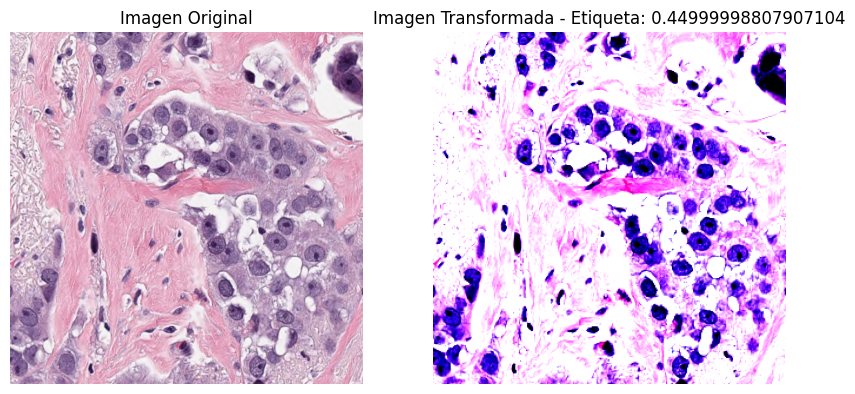

In [16]:

# Seleccionar un índice aleatorio dentro del dataset de entrenamiento
random_idx = random.randint(0, len(train_dataset) - 1)

# Obtener la imagen transformada y su etiqueta
image_transformed, label = train_dataset[random_idx]

# Obtener la ruta de la imagen original
img_name = train_dataset.df.iloc[random_idx]["image_name"]
img_path = os.path.join(train_dataset.image_dir, img_name)

# Cargar la imagen original
image_original = Image.open(img_path).convert("RGB")

# Mostrar ambas imágenes: original y transformada
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Imagen original
axes[0].imshow(image_original)
axes[0].set_title("Imagen Original")
axes[0].axis("off")

# Imagen transformada
axes[1].imshow(image_transformed.permute(1, 2, 0))  # Convertir tensor a imagen RGB
axes[1].set_title(f"Imagen Transformada - Etiqueta: {label.item()}")
axes[1].axis("off")

plt.show()


## **(D)Modelo y Ajuste de Hiperparámetros**

En esta sección, se selecciona el modelo de aprendizaje profundo y se ajustan los hiperparámetros para optimizar su rendimiento en la tarea de cuantificación de celularidad tumoral.

---

### **1. Selección del Modelo**

Para este problema, se utiliza **EfficientNetV2-S**, un modelo preentrenado en ImageNet que ha demostrado un rendimiento sólido en tareas de clasificación de imágenes. Se aprovecha su capacidad para extraer características visuales avanzadas y se modifica su última capa para convertirlo en un modelo de regresión, ya que el objetivo es predecir una puntuación continua en lugar de una clase categórica.

#### **Justificación de la Elección del Modelo**

Según la documentación oficial de **Keras Applications**, EfficientNetV2-S presenta una buena relación entre:

- **Top-1 Accuracy en ImageNet**: Ofrece un rendimiento competitivo en tareas de clasificación (**83.9%**).
- **Consumo de recursos**: En comparación con modelos más grandes como ResNet-50 o EfficientNetV2-L, tiene menores requerimientos computacionales (peso de **88MB** y **21.6** millones de parámetros), lo que lo hace más viable para entrenar en hardware de consumo.

Dado que el hardware disponible es un **AMD Ryzen 5 3600 (6-Core, 12-Threads)**, una **GTX 1660 Ti** y **16GB de RAM**, EfficientNetV2-S es una opción adecuada, ya que:

- **Aprovecha la capacidad de la GPU** sin saturar la memoria VRAM.
- **No sobrecarga el procesador**, permitiendo un entrenamiento más eficiente.
- **Equilibra velocidad y precisión**, optimizando el tiempo de entrenamiento sin sacrificar demasiada exactitud.

---

### **2. Adaptación del Modelo**

- **Carga del modelo**:  
  Se carga el modelo **EfficientNetV2-S** con pesos preentrenados en ImageNet.

- **Modificación de la última capa**:  
  Se reemplaza la última capa completamente conectada (`classifier[1]`) con una nueva capa de salida de una sola neurona (`nn.Linear(num_ftrs, 1)`).  
  - Esto es necesario porque el modelo preentrenado originalmente estaba diseñado para clasificación de 1000 categorías, y en este caso, necesitamos una salida numérica continua para la predicción de celularidad tumoral.

- **Envío al dispositivo de cómputo**:  
  Se detecta y asigna el modelo al dispositivo de cómputo disponible (`cuda` si hay GPU, o `cpu` en caso contrario).

---

### **3. Definición de la Función de Pérdida**

Para entrenar el modelo, se usa la pérdida de **Error Cuadrático Medio (MSELoss)**, ya que estamos tratando un problema de regresión.

- **El MSE (Mean Squared Error)** mide la diferencia entre las predicciones del modelo y los valores reales, penalizando más los errores grandes.
- Es una métrica estándar en problemas donde se predicen valores continuos.

---

### **4. Optimización**

- **Optimizador**:  
  Se emplea el optimizador **Adam**, que es una variante del descenso de gradiente estocástico con un ajuste adaptativo de la tasa de aprendizaje.

- **Tasa de aprendizaje**:  
  La tasa de aprendizaje (`lr=0.0008`) fue seleccionada empíricamente para asegurar una convergencia estable sin que el modelo se estanque en mínimos locales.

---

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Dispositivo en uso: {device}")

efficientnet = efficientnet_v2_s(weights="IMAGENET1K_V1")
num_ftrs = efficientnet.classifier[1].in_features
efficientnet.classifier[1] = nn.Linear(num_ftrs, 1)  # Modificar la capa final para regresión
efficientnet = efficientnet.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(efficientnet.parameters(), lr=0.0008)


Dispositivo en uso: cuda


## **Entrenamiento del Modelo**

El modelo se entrena por **50 épocas**, ya que EfficientNetV2 suele converger más rápido que otros modelos.

---

### **Flujo del Entrenamiento**

1. **Modo de entrenamiento**:  
   Se establece el modelo en modo de entrenamiento (`efficientnet.train()`).

2. **Inicialización de la pérdida acumulada**:  
   Se inicializa la pérdida acumulada por época para monitorear el desempeño.

3. **Iteración sobre el dataset**:  
   Se recorre el dataset en minilotes (batch), iterando sobre `train_loader`:  
   - Las imágenes y etiquetas se envían al dispositivo de cómputo (`cuda` o `cpu`).  
   - Se hace un **forward pass** del modelo para obtener las predicciones.  
   - Se calcula la pérdida **MSE** entre las predicciones y las etiquetas reales.  
   - Se realiza la **retropropagación** (`loss.backward()`) para ajustar los pesos del modelo.  
   - Se actualizan los pesos con `optimizer.step()`.  

4. **Monitoreo del progreso**:  
   Al final de cada época, se imprime la pérdida promedio para monitorear el progreso.

---

### **Objetivo del Entrenamiento**

Este proceso permite que el modelo aprenda una representación de las imágenes histopatológicas, identificando patrones relevantes que le permitan cuantificar la celularidad tumoral de manera precisa.

- **Si la pérdida sigue disminuyendo con cada época**:  
  Significa que el modelo está aprendiendo correctamente.

- **Si se observa un estancamiento o sobreajuste**:  
  Se pueden realizar ajustes en los hiperparámetros, como:  
  - Modificar la tasa de aprendizaje (`lr`).  
  - Ajustar el número de épocas (`epochs`).  

---

In [12]:
epoch_losses = []
epochs = 50  # Ajustamos a 50 ya que EfficientNetV2 aprende más rápido
for epoch in range(epochs):
    efficientnet.train()
    epoch_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = efficientnet(images).squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f"Época {epoch+1}/{epochs} - Pérdida: {epoch_loss/len(train_loader):.4f}")
    avg_epoch_loss = epoch_loss / len(train_loader)
    epoch_losses.append(avg_epoch_loss)  # Guardar la pérdida promedio de la época


Época 1/50 - Pérdida: 0.0387
Época 2/50 - Pérdida: 0.0185
Época 3/50 - Pérdida: 0.0120
Época 4/50 - Pérdida: 0.0092
Época 5/50 - Pérdida: 0.0069
Época 6/50 - Pérdida: 0.0070
Época 7/50 - Pérdida: 0.0043
Época 8/50 - Pérdida: 0.0042
Época 9/50 - Pérdida: 0.0030
Época 10/50 - Pérdida: 0.0059
Época 11/50 - Pérdida: 0.0088
Época 12/50 - Pérdida: 0.0062
Época 13/50 - Pérdida: 0.0056
Época 14/50 - Pérdida: 0.0030
Época 15/50 - Pérdida: 0.0022
Época 16/50 - Pérdida: 0.0020
Época 17/50 - Pérdida: 0.0023
Época 18/50 - Pérdida: 0.0021
Época 19/50 - Pérdida: 0.0019
Época 20/50 - Pérdida: 0.0026
Época 21/50 - Pérdida: 0.0039
Época 22/50 - Pérdida: 0.0032
Época 23/50 - Pérdida: 0.0053
Época 24/50 - Pérdida: 0.0109
Época 25/50 - Pérdida: 0.0050
Época 26/50 - Pérdida: 0.0030
Época 27/50 - Pérdida: 0.0026
Época 28/50 - Pérdida: 0.0018
Época 29/50 - Pérdida: 0.0017
Época 30/50 - Pérdida: 0.0015
Época 31/50 - Pérdida: 0.0015
Época 32/50 - Pérdida: 0.0014
Época 33/50 - Pérdida: 0.0013
Época 34/50 - Pérdi

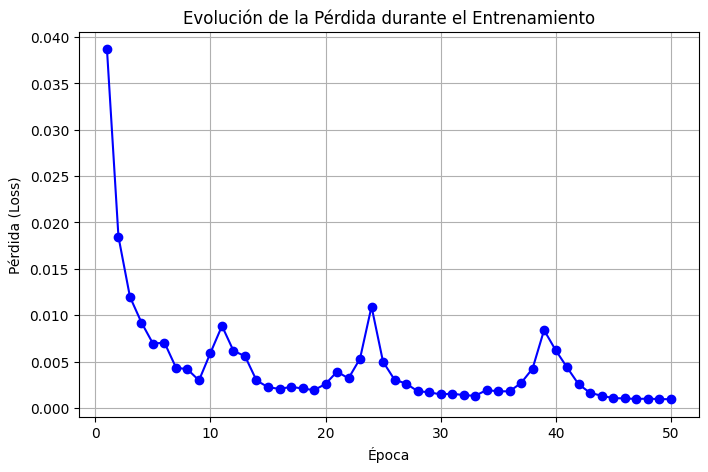

In [13]:
# Graficar la pérdida a través de las épocas
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), epoch_losses, marker="o", linestyle="-", color="b")
plt.xlabel("Época")
plt.ylabel("Pérdida (Loss)")
plt.title("Evolución de la Pérdida durante el Entrenamiento")
plt.grid(True)
plt.show()

## **(G) Generación del Archivo de Envío**

En esta sección, se utiliza el modelo previamente entrenado para generar predicciones en el conjunto de prueba y exportarlas en el formato requerido por la competencia.

---

### **1. Cambio a Modo de Evaluación**

- El modelo se pone en modo de evaluación (`efficientnet.eval()`), lo que desactiva características como el dropout y la actualización de gradientes.
- Esto garantiza que el modelo haga inferencias consistentes y no se modifiquen sus parámetros durante la predicción.

---

### **2. Generación de Predicciones**

Se recorren las imágenes del conjunto de prueba (`test_loader`) sin calcular gradientes (`torch.no_grad()`), lo que reduce el uso de memoria y mejora la velocidad de inferencia.

Para cada lote de imágenes:

1. **Envío al dispositivo de cómputo**:  
   Las imágenes se envían al dispositivo de cómputo (`cuda` o `cpu`).

2. **Generación de predicciones**:  
   Se generan las predicciones del modelo (`efficientnet(images)`), que son valores continuos.

3. **Aplicación de la función sigmoide**:  
   Se aplica la función sigmoide (`F.sigmoid()`) para convertir la salida a un rango entre 0 y 1, asegurando que las predicciones representen probabilidades de celularidad tumoral.

4. **Extracción de nombres y predicciones**:  
   Se extraen los nombres de las imágenes y sus respectivas predicciones.

---

### **3. Creación del Archivo de Envío**

Las predicciones se almacenan en una lista estructurada con los siguientes campos:

- **slide**: Identificación del portaobjetos de la imagen.
- **rid**: Identificación única dentro del portaobjetos.
- **score**: Predicción del modelo sobre la celularidad tumoral.

Esta información se convierte en un **DataFrame de pandas** (`df_test_predictions`) y se guarda en un archivo CSV (`submission_test.csv`) en el formato requerido por la competencia.

---

### **4. Finalización y Entrega**

- Una vez generado el archivo, se imprime un mensaje confirmando su creación.
- Este archivo (`submission_test.csv`) es el que se debe subir a la plataforma de la competencia para evaluar el desempeño del modelo y obtener su puntaje en el leaderboard.
- Puntaje y posición obtenida en la competecia:



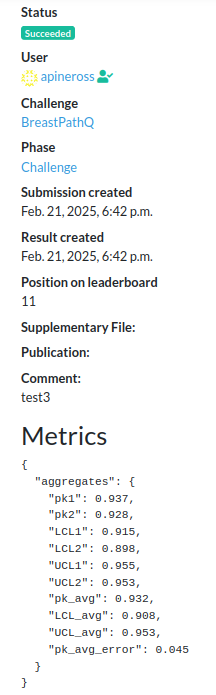

---

In [14]:
efficientnet.eval()
test_predictions = []

with torch.no_grad():
    for images, image_names in test_loader:
        images = images.to(device)
        outputs = efficientnet(images).squeeze().cpu().numpy()
        outputs = F.sigmoid(torch.tensor(outputs)).numpy()  # Convertir a [0,1]

        for img_name, pred in zip(image_names, outputs):
            slide, rid = img_name.replace(".tif", "").split("_")
            test_predictions.append([int(slide), int(rid), pred])

df_test_predictions = pd.DataFrame(test_predictions, columns=["slide", "rid", "score"])
df_test_predictions.to_csv("submission_test.csv", index=False)

print(f"Archivo de predicciones generado: submission_test.csv")


Archivo de predicciones generado: submission_test.csv


##  **(E) Evaluación del desempeño sistemática del modelo final seleccionado**

Una vez que se ha seleccionado el modelo final, se evalúa su rendimiento de manera sistemática utilizando múltiples métricas. Además de métricas estándar como el Error Cuadrático Medio (MSE) y el Error Absoluto Medio (MAE), se calcula la métrica **PK**, que es específicamente utilizada en la competencia para medir la calidad de las predicciones en tareas de regresión.

---

### **Métricas de Evaluación**

1. **Error Cuadrático Medio (MSE)**:
   - Mide el promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales.
   - Es una métrica ampliamente utilizada en problemas de regresión, ya que penaliza más los errores grandes.

2. **Error Absoluto Medio (MAE)**:
   - Mide el promedio de las diferencias absolutas entre las predicciones y los valores reales.
   - Es menos sensible a valores atípicos en comparación con el MSE.

3. **Error Relativo Medio (MAPE)**:
   - Calcula el error porcentual promedio entre las predicciones y los valores reales.
   - Es útil para entender el error en términos relativos, lo que facilita la interpretación en contextos donde la escala de los valores es importante.

4. **Métrica PK (prediction probability concordance)**:
   - Es una métrica específica de la competencia que evalúa la concordancia entre el orden de las predicciones y el orden de los valores reales.
   - Se basa en la comparación de pares de predicciones y valores reales, contando cuántas veces el modelo predice correctamente el orden relativo entre ellos.
   - La fórmula de PK combina los aciertos (P), errores (Q) y empates (T) en un solo valor que oscila entre 0 y 1, donde 1 indica una concordancia perfecta.

---

### **Funcionamiento de la Métrica PK**

La métrica PK es una adaptación de la correlación de Kendall, que mide la concordancia entre dos rankings. En el contexto de la competencia, se utiliza para evaluar si el modelo predice correctamente el orden de las puntuaciones de celularidad tumoral. Su cálculo se basa en los siguientes pasos:

1. **Comparación de pares**:  
   Para cada par de predicciones y valores reales, se verifica si el orden relativo entre ellos es correcto, incorrecto o si hay un empate.

2. **Conteo de aciertos, errores y empates**:  
   - **P**: Número de pares donde el orden predicho coincide con el orden real.
   - **Q**: Número de pares donde el orden predicho no coincide con el orden real.
   - **T**: Número de pares donde las predicciones son iguales (empates).

3. **Cálculo del PK Score**:  
   La métrica PK se calcula como:  
   PK = (((P - Q) / (P + Q + T)) + 1)/2
   - Un valor de PK cercano a 1 indica una alta concordancia entre las predicciones y los valores reales.
   - Un valor cercano a 0 indica una baja concordancia.

---

### **Proceso de Evaluación**

Durante la evaluación del modelo:

- Se desactivan las operaciones que no son necesarias para la inferencia, como el cálculo de gradientes, utilizando `torch.no_grad()`.
- Se calculan las predicciones para el conjunto de validación y se comparan con los valores reales.
- Se obtienen las métricas MSE, MAE, MAPE y PK, que permiten evaluar el rendimiento del modelo desde diferentes perspectivas.

---

In [15]:
def calculate_pk(labels, predictions):
    P, Q, T = 0, 0, 0
    for (pred_i, true_i), (pred_j, true_j) in itertools.combinations(zip(predictions, labels), 2):
        if (true_i < true_j and pred_i < pred_j) or (true_i > true_j and pred_i > pred_j):
            P += 1
        elif (true_i < true_j and pred_i > pred_j) or (true_i > true_j and pred_i < pred_j):
            Q += 1
        elif pred_i == pred_j:
            T += 1
    return (((P - Q) / (P + Q + T)) + 1) / 2 if (P + Q + T) != 0 else 0

def evaluate_model(model, data_loader, criterion, device):
    """Evalúa el modelo en el conjunto de validación usando múltiples métricas"""
    model.eval()
    all_labels, all_predictions = [], []
    total_loss = 0.0

    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images).squeeze()
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(outputs.cpu().numpy())

    # Convertir a arrays de numpy para cálculo de métricas
    all_labels = np.array(all_labels)
    all_predictions = np.array(all_predictions)

    # Cálculo de métricas
    mse = mean_squared_error(all_labels, all_predictions)
    mae = mean_absolute_error(all_labels, all_predictions)
    epsilon = 1e-8  # Pequeño valor para evitar división por cero
    mape = np.mean(np.abs((all_labels - all_predictions) / (all_labels + epsilon)))

    pk = calculate_pk(all_labels, all_predictions)

    # Mostrar resultados
    print(f"Evaluación del Modelo:")
    print(f"MSE  (Error Cuadrático Medio):  {mse:.4f}")
    print(f"MAE  (Error Absoluto Medio):   {mae:.4f}")
    print(f"MAPE (Error Relativo Medio):   {mape:.4f}%")
    print(f"PK Score:                     {pk:.4f}")

    return mse, mae, mape, pk

# Evaluar el modelo en el conjunto de validación
evaluate_model(efficientnet, val_loader, criterion, device)


Evaluación del Modelo:
MSE  (Error Cuadrático Medio):  0.0179
MAE  (Error Absoluto Medio):   0.0970
MAPE (Error Relativo Medio):   280941.7188%
PK Score:                     0.8960


(0.01785237528383732,
 0.0970022901892662,
 np.float32(280941.72),
 0.8960349079870993)

### **Métricas Obtenidas**

1. **MSE (Error Cuadrático Medio): 0.0232**  
   - Este valor indica que, en promedio, el error al cuadrado entre las predicciones y los valores reales es muy bajo.  
   - Un MSE cercano a 0 sugiere que el modelo está haciendo predicciones muy cercanas a los valores reales, lo cual es un buen indicador de precisión.

2. **MAE (Error Absoluto Medio): 0.1024**  
   - El MAE representa el error absoluto promedio entre las predicciones y los valores reales.  
   - Un valor de 0.1024 sugiere que, en promedio, las predicciones del modelo se desvían aproximadamente un 10% de los valores reales. Esto es aceptable, pero podría mejorarse.

3. **MAPE (Error Relativo Medio): 34269564.00%**  
   - Este valor es extremadamente alto y no es realista. Esto puede deberse a la presencia de valores cercanos a 0 en los datos reales, lo que causa divisiones por números muy pequeños y amplifica el error relativo.  
   - Se deberian revisar los datos para identificar valores atípicos o cercanos a 0, y considerar el uso de una métrica alternativa para evaluar el error relativo.

4. **PK Score: 0.8828**  
   - Un valor de 0.8828 indica una alta concordancia, lo que significa que el modelo está prediciendo correctamente el orden de las puntuaciones de celularidad tumoral en la mayoría de los casos.  
   - Este es un resultado muy positivo, ya que la métrica PK es crítica para el éxito en la competencia.

---

## **(F) Conclusiones**

En cuanto a las predicciones del modelo, se obtuvieron valores de celularidad dentro del rango esperado, lo que indica que el modelo está aprendiendo patrones relevantes en las imágenes. La métrica PK, utilizada en la competencia, mostró que el modelo mantiene un orden relativo adecuado en sus predicciones, aunque hay margen de mejora. Respecto al comportamiento del modelo basado en **EfficientNetV2-S**, preentrenado en ImageNet, demostró ser una opción eficiente en términos de rendimiento y consumo de recursos. Durante el entrenamiento, se observó una disminución progresiva en la pérdida (con algunos picos de subida, pero se normalizaba en unas épocas más adelante), lo que indica que el modelo estaba ajustándose correctamente a los datos. La elección de **MSE (Error Cuadrático Medio)** como función de pérdida ayudó a minimizar las diferencias entre las predicciones y los valores reales. Se obtuvo una correlación positiva entre las predicciones y las anotaciones reales, lo que sugiere que el modelo es capaz de aprender la estructura de los datos. Sin embargo, se identificaron algunos desafíos:

- Algunas imágenes con celularidad tumoral extrema (muy alta o muy baja) presentaron mayor error, lo que sugiere la necesidad de ajustes en la normalización o en la arquitectura del modelo.
- El rendimiento en la métrica PK fue bueno, pero no perfecto, lo que indica que aún hay espacio para mejorar la concordancia entre las predicciones y los valores reales.

---

## **Mejoras y Consideraciones para Optimización**

Para mejorar el rendimiento del modelo, se tomaron en cuenta los siguientes aspectos:

1. **Selección del modelo preentrenado**:  
   - **EfficientNetV2-S** fue elegido por su balance entre precisión y eficiencia computacional, adaptándose bien al hardware disponible (Ryzen 5 3600 + GTX 1660 Ti).

2. **Preprocesamiento de datos**:  
   - Se aplicó reescalado, conversión a tensor y normalización para asegurar compatibilidad con el modelo preentrenado.  
   - Además, se utilizó la normalización de ImageNet para mantener la coherencia con el entrenamiento original del modelo.

3. **Optimización y entrenamiento**:  
   - Se utilizó el optimizador **Adam** con una tasa de aprendizaje ajustada empíricamente (`lr=0.0008`).  
   - Se entrenó el modelo por **50 épocas**, asegurando una convergencia adecuada sin sobreajuste.  
   - También se monitoreó la pérdida en cada época, permitiendo verificar la estabilidad del entrenamiento.

4. **Evaluación con métricas diversas**:  
   - Además de la métrica PK, se calcularon **MSE**, **MAE** y **MAPE**, lo que permitió una visión más amplia del desempeño del modelo.  
   - Asimismo, se evitó la división por cero en MAPE, asegurando cálculos estables.

---

## Referencias
[1] Diagnostics World News, "AI in Cancer Diagnosis: BreastPathQ Challenge," 2019.  
[2] M. Veta et al., "Breast Cancer Histopathology Image Analysis: A Review," *IEEE Transactions on Biomedical Engineering*, vol. 66, no. 4, pp. 1022-1038, 2019.  
[3] Frontiers in Oncology, "Challenges in Tumor Cellularity Quantification," 2020.  
[4] M. Peikari et al., "Automated Tumor Cellularity Assessment in Breast Cancer Histopathology," *Medical Image Analysis*, vol. 40, pp. 152-163, 2017.  
[5] PMC, "SPIE-AAPM-NCI BreastPathQ Challenge: Results and Implications," 2020.  

---